# Single-Qubit Systems
<hr></hr>

In the introductory chapter to [quantum bits and circuits](https://learnquantum.io/chapters/02_quantum_computing/02_01_bits_to_qubits.html), we presented the model of a qubit inspired by the probabilistic nature of the spin of an electron. However, we only described how the electron behaves when its spin was pointing in the $\texttt{+}z, \texttt{-}z, \texttt{+}x, \texttt{-}x$ directions (to which we assigned the qubit states $|0\rangle, |1\rangle, |+\rangle, |-\rangle$, respectively). 

But what if the electron spin is pointing along some arbitrary angle with respect to the $\texttt{+}z$ direction? We did mention that the probability of measuring spin-up or spin-down depends on this angle, but did not give a quantitative rule for how electrons behave. 

In this chapter, we will not only expand on this idea, but we will also broaden the definition of the state that describes the spin of an electron pointing in any direction, which represents the most general way to express the state of a qubit. We will then introduce the [Bloch Sphere](https://en.wikipedia.org/wiki/Bloch_sphere), which is a graphical representation of the mathematical description of the qubit's state, and lastly discuss the different operations we can apply to a qubit to transform it from one arbitrary state to another.

## 1. Generalizing the Qubit

Our goal for this section is to derive the final mathematical definition of a qubit. For this, we will follow a similar approach to that of the previous two chapters; that is, through a discovery process using simple examples. Our final goal is to derive the general vector representation of a qubit, given by:

$$ |q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}, \text{ such that:} \; \alpha_j \in \mathbb{C}, \; \text{and} \; \sqrt{|\alpha_0|^2 + |\alpha_1|^2} = 1 ,$$

which is a generalization of our definition for the bit, where the only entries allowed were $0$ and $1$:


$$ |b\rangle = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \text{ such that:} \; \beta_j \in \{0, 1\}, \; \text{and} \; \sqrt{|\beta_0|^2 + |\beta_1|^2} = 1 .$$

So, let's take a first step and see how we go from the few specific statevectors we've presented so far, to a more general (but partial) representation using real numbers. After that, we will discover why we need to incorporate complex values as well in our definition. Lastly, we will combine these two steps to get a complete representation of a general qubit and its visual representation in the Bloch sphere.

### 1.1 Real Probability Amplitudes

Let us, once again, revisit the Stern-Gerlach experiment and consider the results of performing repeated experiments on an electron with its spin at an angle $\theta$ with respect to the $\texttt{+}z$ axis, as shown in the image below. Observations demonstrate that, in this scenario, the probability of the electron deflecting in the $\texttt{+}z$ direction (i.e., measuring state $|0\rangle$) is given by the cosine squared of the angle $\theta/2$:

$$ \mathbb{P}_{0} = \cos^2\left(\frac{\theta}{2}\right) $$

Similarly, the probability of the electron deflecting in the $\texttt{-}z$ direction (i.e., measuring state $|1\rangle$) is equal the sine squared of the angle:

$$ \mathbb{P}_{1} = \sin^2\left(\frac{\theta}{2}\right) $$

<img src="images/02_03_01_stern-gerlach_angle_prob.png" align = "center" width="360"/>

From a probability standpoint, these expressions work since the sum of sine and cosine squared for any common angle always add to one, just like probabilities ought to do:

$$
\begin{aligned}
\mathbb{P}_{0} &+ \mathbb{P}_{1} = 1
\\
\\
\cos^2\left(\frac{\theta}{2}\right) &+ \sin^2\left(\frac{\theta}{2}\right) = 1
\end{aligned}
$$

Therefore, as discussed in the section on [probability amplitudes](https://learnquantum.io/chapters/02_quantum_computing/02_01_bits_to_qubits.html#from-probabilities-to-probability-amplitudes), we can construct a statevector that represents the state of a qubit (electron spin) by making sure that when the selected probability amplitudes are squared, we obtain the empirical probabilities that match those from observed results via experimentation (as specified by the [Born rule](https://en.wikipedia.org/wiki/Born_rule)):

$$ 
\begin{aligned}
|q\rangle &= \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) \end{bmatrix}
\\
\\
|q\rangle &= \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right) |1\rangle 
\end{aligned}
$$

It is easy to see that the expression above is of the form:

$$ |q\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \text{ such that:} \; a_j \in \mathbb{R}, \; \text{and} \; \sqrt{a_0^2 + a_1^2} = 1 ,$$

which is very close to the final definition of a qubit we set ourselves to find. The only exception is that the vector elements here are real-valued rather than complex numbers. We will explore why we need complex values in the following section, but for now, we can see this expression works for the four electron spin cases we have explored so far:

| Spin Direction | Qubit State | Angle $\theta$ [rad] | $\cos\left(\frac{\theta}{2}\right)$ |  $\sin\left(\frac{\theta}{2}\right)$ |
| :-: | :-: | :-: | :-: | :-: |
| $\texttt{+}z$ | $\vert 0\rangle$ | $0$ | $1$ | $0$ |
| $\texttt{-}z$ | $\vert 1\rangle$ | $\pi$ |  $0$ | $1$ |
| $\texttt{+}x$ | $\vert +\rangle$ | $\frac{\pi}{2}$ | $\frac{1}{\sqrt{2}}$ | $\frac{1}{\sqrt{2}}$ |
| $\texttt{-}x$ | $\vert -\rangle$ | $\frac{3\pi}{2}$ | $\frac{1}{\sqrt{2}}$ | $-\frac{1}{\sqrt{2}}$ |

But more generally, it works for any angle $\theta$. Let's look at the specific example where $\theta = \pi/3$. The expectation is that we will get the following respective probabilities for measuring states $|0\rangle$ and $|1\rangle$:

$$ 
\begin{aligned}
&\mathbb{P}_{0} = \cos^2\left(\frac{\pi/3}{2}\right) = \left(\frac{\sqrt{3}}{2}\right)^2 = \frac{3}{4} = 0.75
\\
\\
&\mathbb{P}_{1} = \sin^2\left(\frac{\pi/3}{2}\right) = \left(\frac{1}{2}\right)^2 = \frac{1}{4} = 0.25
\end{aligned}
$$


And now let's use the `Statevector` class in qiskit to construct this statevector, and see if the measurement probabilities match our expectation:

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector

θ = np.pi/3                # Spin angle wrt to +z axis
α0 = np.cos(θ/2)           # Probability amplitude associated with |0⟩
α1 = np.sin(θ/2)           # Probability amplitude associated with |1⟩

q = Statevector([α0, α1])  # Construct statevector |q⟩ = α0|0⟩ + α1|1⟩ = [α0 α1]ᵀ

probs = q.probabilities() # Extract expected probs array [P₀, P₁]
print(probs)

[0.75 0.25]


The result above is the calculation of the analytical probabilities, but we can also sample the statevector (as if we were performing measurements in this system) and get a distribution of results that should be approximately give us $75\%$ of measuring $0$ and $25\%$ of measuring $1$:

In [2]:
counts = q.sample_counts(shots=1000) # "Measure" statevector 1000 times and return dictionary
                                     # of the form: {'0': number_of_0s, '1': number_of_1s}
print(counts)

{'0': 722, '1': 278}


This generalization of the qubit, where the probability amplitudes are given by the $\cos^2$ and $\sin^2$ of the angle $\theta/2$, works well to describe the results of the Stern-Gerlach experiment; however, there is a bit of an issue. In this particular case, we are only concerned about the direction of the spin on the $xz$-plane because we are shooting the electrons along the $y$ direction. But how do we describe the spin of the electron if it is aligned with, let's say, the $\texttt{+}y$ axis? Well, experiments show that, if we were to measure the spin of such an electron with a field oriented along the $z$ axis, we will still see the electron deflecting up or down with $50\%$ probability (just like we do for spin in the $\texttt{+}x$ direction). As a matter of fact, this is true no matter which orientation (given by the angle $\varphi$) the electron has in the $xy$-plane:

<img src="images/02_03_02_elec_phi_angle.png" align = "center" width="520"/>

So, how do we represent such states? After all, for spin along the $\pm x$ directions, we defined the probability amplitudes by taking the positive and negative square roots of the probability of measuring spin-up and spin-down, so what do we do for spin along, let's say the $\pm y$ directions?

<div style="text-align: center;"> <strong> ¡Complex Numbers to the Rescue! </strong> </div>

### 1.2 Complex Probability Amplitudes

Let us start by recalling the reason why we chose states $|+\rangle$ and $|-\rangle$ to be of the form:

$$ 
|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \quad \text{ and } \quad
|-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle.
$$

First off, we chose the values of these probability amplitudes because, when we square them, we still get the correct probabilities of measuring $0$ and $1$:

$$
\begin{aligned}
\text{For state } |+\rangle : \mathbb{P}_0 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} \quad &\text{and} \quad 
\mathbb{P}_1 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}.
\\
\\
\text{For state } |-\rangle : \mathbb{P}_0 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} \quad &\text{and} \quad  
\mathbb{P}_1 = \left(-\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}.
\end{aligned}
$$

And secondly, the signs for the probability amplitudes were selected to allow us to express states $|0\rangle$ and $|1\rangle$ in terms of states $|+\rangle$ and $|-\rangle$ in a way that is consistent with observations when measurements of spin are performed along the $x$ axis. More concretely, for state $|0\rangle$:

$$
\begin{aligned}
|0\rangle &= \frac{1}{\sqrt{2}}|+\rangle + \frac{1}{\sqrt{2}}|-\rangle 
\\
\\
&= \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \right) + \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \right) 
\\
\\
&= \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle + \frac{1}{2}|0\rangle - \frac{1}{2}|1\rangle
\\
\\
&= |0\rangle .
\end{aligned}
$$

And, for state $|1\rangle$:

$$
\begin{aligned}
|1\rangle &= \frac{1}{\sqrt{2}}|+\rangle - \frac{1}{\sqrt{2}}|-\rangle 
\\
\\
&= \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \right) - \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \right) 
\\
\\
&= \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle - \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle
\\
\\
&= |1\rangle .
\end{aligned}
$$

So, what do we do for the probability amplitudes of the states corresponding to spins along the $\pm y$ directions? Well, we need to follow similar rules to those we had for spin along $\pm x$ axes:

1. When "squared", they must be equal to probability values of $1/2$. 
2. We must be able to consistently express states $|0\rangle$ and $|1\rangle$ as superpositions of these states.

Unfortunately, the only **real** numbers that meet these conditions are $+1/\sqrt{2}$ and $-1/\sqrt{2}$, which are what we use for states $|+\rangle$ and $|-\rangle$. However, with just a small adjustment to the probability rule given above, **complex** numbers can save the day and make our model consistent with observations!

To understand the adjustment we need to make, let's start by recalling that a complex number $c$ is of the form:

$$ c = a + bi, $$

where $a, b \in \mathbb{R}$, and are known as the **real** and **imaginary** parts of $c$, respectively. Furthermore, $i$ is known as the imaginary unit, which satisfies the property that when squared, it equals negative one: $i^2 = -1 .$

Complex numbers can then be graphically represented in what is known as the complex plane, with the horizontal direction representing the real axis, and the vertical direction the imaginary axis: 

<img src="images/02_03_03_complex_plane.png" align = "center" width="250"/>

With this in mind, we can make the very simple observation that, in this plane, the imaginary numbers $i$ and $-i$ are in an orthogonal number line to that of the real numbers, which includes the values $1$ and $-1$, and all of which lie in a circle of radius $1$:

<img src="images/02_03_04_i_in_plane.png" align = "center" width="250"/>

<a name="back1"></a> So, if we superimpose the complex plane on the $xy$-plane that defines the direction of the electron spin, we can see that we can associate a complex value in the unit circle with the direction of the spin statevector in this plane[$^*$](#footnote1):

<img src="images/02_03_05_spin_in_complex_plane.png" align = "center" width="250"/>

Furthermore, if we multiply this complex number with **one** of the two probability amplitudes of our statevector, we will indeed get the full and accurate representation of a quantum bit. So, for example, states $|+\rangle$ and $|-\rangle$, which are aligned with the $\texttt{+}x$ and $\texttt{-}x$ directions, have one of their probability amplitudes multiplied by $+1$ and $-1$, respectively. Similarly, we can define the states for spin aligned with the $\texttt{+}y$ and $\texttt{-}y$ directions by multiplying one of their probability amplitudes by $+i$ and $-i$, accordingly:

$$ 
\begin{aligned}
|r\rangle &= \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle,
\\
\\
|l\rangle &= \frac{1}{\sqrt{2}}|0\rangle - \frac{i}{\sqrt{2}}|1\rangle.
\end{aligned}
$$

<a name="back2"></a>We label this states as $|r\rangle$ and $|l\rangle$ because, when looking at the three-dimensional Cartesian plane, they point in the "right" and "left" directions, respectively[$^\dagger$](#footnote2).

Now, upon close inspection, these two statevectors do not really meet our probability condition! If we were to square the probability amplitude associated with $|1\rangle$, for let's say state $|r\rangle$, we would get an invalid probability because squaring $i$ gives us a negative value:

$$ \mathbb{P}_1 = \left(\frac{i}{\sqrt{2}}\right)^2 = -\frac{1}{2} \, \leftarrow \textbf{invalid probability} .$$

Luckily, this has a simple fix. If instead of taking the square of probability amplitudes to find probability, we find its squared modulus, we will then always get a positive value. So, for an arbitrary complex number $c$, we find it's squared modulus by multiplying the number with its [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate):

$$ 
\begin{aligned}
|c|^2 &= c\, c^{*} = (a+bi)(a-bi) 
\\
\\
|c|^2 &= a^2 -abi + abi -b^2i^2
\\
\\
|c|^2 &= a^2 + b^2 
\end{aligned}
$$

Therefore, our updated (and final) version of the Born rule says that, to find the probability of measuring some given state we must take the squared modulus of the probability amplitude associated with it. Thus, for states $|r\rangle$ and $|l\rangle$ the probabilities of measuring $0$ and $1$ given below are consistent with what we observe from experimentation:

$$
\begin{aligned}
\text{For state } |r\rangle : \mathbb{P}_0 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2} \quad &\text{and} \quad 
\mathbb{P}_1 = \left|\frac{i}{\sqrt{2}}\right|^2 = \frac{1}{2}.
\\
\\
\text{For state } |l\rangle : \mathbb{P}_0 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2} \quad &\text{and} \quad  
\mathbb{P}_1 = \left|-\frac{i}{\sqrt{2}}\right|^2 = \frac{1}{2}.
\end{aligned}
$$

Now, let's inspect if we can recover states $|0\rangle$ and $|1\rangle$ by taking equal superpositions of these vectors, which is a condition derived from observations of running, for example, the Stern-Gerlach experiment with the magnetic field along the $y$ axis. So, first let's take a positive superposition:

$$
\begin{aligned}
\frac{1}{\sqrt{2}}|r\rangle + \frac{1}{\sqrt{2}}|l\rangle &= \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle \right) + \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{i}{\sqrt{2}}|1\rangle \right) 
\\
\\
&= \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle + \frac{1}{2}|0\rangle - \frac{i}{2}|1\rangle
\\
\\
&= |0\rangle,
\end{aligned}
$$

which clearly shows we can express $|0\rangle$ in terms of $|r\rangle$ and $|l\rangle$. And now if we take a negative superposition we get:

$$
\begin{aligned}
\frac{1}{\sqrt{2}}|r\rangle - \frac{i}{\sqrt{2}}|l\rangle &= \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle \right) - \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{i}{\sqrt{2}}|1\rangle \right) 
\\
\\
&= \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle - \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle
\\
\\
&= i|1\rangle.
\end{aligned}
$$

So we do not quite get exactly $|1\rangle$ since the state above is premultiplied by a factor of $i$, but the thing is that states $|1\rangle$ and $i|1\rangle$ are effectively the equivalent. This is because, what we really want out of this quantum-mechanical model is to be able to get accurate predictions of what we observe through experimentation. So we have to ask ourselves, what is expression $i|1\rangle$ telling me about what I will *measure* from this state? Well, we know that we will observe state $|1\rangle$ with a probability of $\mathbb{P}_1 = |i|^2 = 1$, which is the same prediction we will get from simply having state $|1\rangle$. We say these two states are *equivalent up to a global phase*. We will explain what the term "global phase" means in the upcoming section.

Clearly, these steps work for states $|r\rangle$ and $|l\rangle$, but what about the rest of possible spin directions in the $xy$-plane? To generalize this approach, all we need to do is assign to each state the corresponding number from the complex unit circle that lies along the same direction as the spin is pointing to. And luckily for us, there is a direct correspondence between this angle and the complex number associated with it. Recall that, any complex $c = (a + bi)$ can also be expressed in [polar form](https://en.wikipedia.org/wiki/Polar_coordinate_system#Complex_numbers) as:

$$ (a + bi) = r \left( \cos(\varphi) + i \sin(\varphi) \right) = r e^{i \varphi} $$

Here, $r$ is the magnitude of the vector associated with the complex number:

$$ r = |c| = \sqrt{a^2 + b^2}, $$

and $\varphi$ is the angle it forms with the real axis:

$$ \varphi = \arg(c) = \text{atan2}(a,b), $$

both of which were shown in the images above in <span style="color:#00B0F0">blue</span>. And for clarity, here $\arg(\,\cdot\,)$ stands for argument, and $\text{atan2}(\,\cdot\,)$ corresponds to the [2-input arctangent](https://en.wikipedia.org/wiki/Atan2) function.

Now, for the specific case of spin on the $xy$ plane, we only need numbers that do not change magnitude of the measured probabilities, therefore we are only interested in complex numbers where $r = 1$. Therefore, the complex number of interest is solely given by $e^{i \varphi}$, which we can use to generalize any state in the $xy$-plane as:

$$ |q\rangle = \frac{1}{\sqrt{2}}|0\rangle + e^{i \varphi} \frac{1}{\sqrt{2}}|1\rangle .$$

### 1.3 Putting it all Together (...and the Bloch Sphere)

We can now combine the results from section 1.1 and 1.2 to get the following general definition for a qubit:

$$ |q\rangle = \cos^2\left(\frac{\theta}{2}\right)|0\rangle + e^{i \varphi} \sin^2\left(\frac{\theta}{2}\right)|1\rangle, $$

where the angles $\theta$ and $\varphi$ respectively define the spin orientation with respect to the $\texttt{+}z$ and $\texttt{+}x$ axes. This visual depiction of spin orientation is so helpful that we actually use it to represent any kind of qubit independent of its physical implementation. But, instead of calling it "spin", we refer to it as a unit vector inside of what is known as the [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere). This vector, however, simply points in the same direction the spin of an electron would be oriented *if* the qubit was of this type:

<img src="images/02_03_06_bloch.png" align = "center" width="300"/>

In the image above we have also added the locations of where the vector will be pointing for states $\left\{(|0\rangle, |1\rangle \right\}, \left\{|+\rangle, |-\rangle \right\}$ and $\left\{|r\rangle, |l\rangle \right\}, $ which, as can be seen, respecitvely lie along the $z$, $x$ and $y$ axes.

Let's now use Qiskit to draw the Bloch sphere representation of an arbitrary qubit. You can change the values of $\theta$ and $\varphi$ to see how the direction of the statevector moves around the sphere:

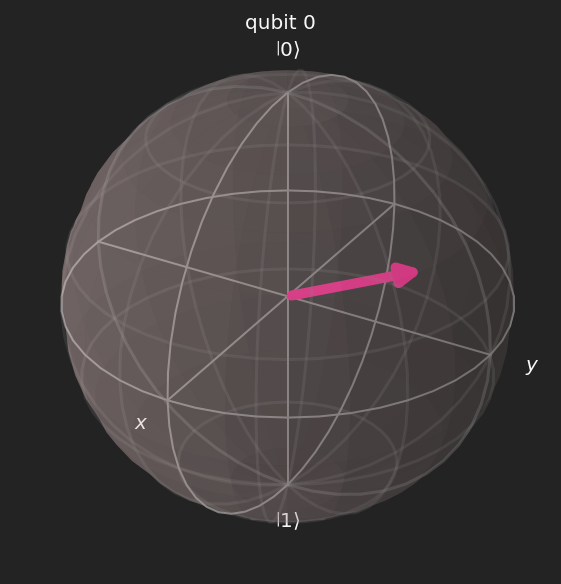

In [3]:
θ = np.pi/3
φ = 2*np.pi/5

α0 = np.cos(θ/2)
α1 = np.sin(θ/2) * np.exp(1j*φ)

sv = Statevector([α0, α1])
sv.draw('bloch')

So this is all well and good, however, there seems to be a small discrepancy between what we had set to be our general definition of a qubit and the expression we derived above. If we look closely at the values of $\alpha_0$ and $\alpha_1$, it seems that it suffices for $\alpha_0$ to be purely real rather than complex:

$$ |q\rangle = \underbrace{\cos^2\left(\frac{\theta}{2}\right)}_{\alpha_0 \in \mathbb{R}}|0\rangle + \underbrace{e^{i \varphi} \sin^2\left(\frac{\theta}{2}\right)}_{\alpha_1 \in \mathbb{C}}|1\rangle, $$

On the other hand, our general definition of a qubit has both $\alpha_0$ and $\alpha_1$ being complex-valued. Luckily, it is not hard to show how to reconcile this difference. Let's start by assuming $\alpha_0, \alpha_1 \in \mathbb{C}$, and expressing them in polar form:

$$
\begin{aligned}
|q\rangle &= \alpha_0 |0\rangle + \alpha_1 |1\rangle
\\
\\
|q\rangle &= r_0 e^{i\varphi_0} |0\rangle + r_1 e^{i\varphi_1} |1\rangle
\end{aligned}
$$

Let's now note that, $r_0, r_1$ are the respective magnitudes of $\alpha_0, \alpha_1$, and therefore: $r_0^2 + r_1^2 = 1$. We can then equate each of these to the sine and cosine terms of the trigonometric identity $\cos(\theta/2)^2 + \sin(\theta/2)^2 = 1$:

$$
|q\rangle = \cos\left(\frac{\theta}{2}\right) e^{i\varphi_0} |0\rangle + \sin\left(\frac{\theta}{2}\right)  e^{i\varphi_1} |1\rangle .
$$

Next, we can factor out the $e^{i\varphi_0}$ term from this expression, resulting in:

$$
|q\rangle = e^{i\varphi_0} \left[ \cos\left(\frac{\theta}{2}\right) |0\rangle + \sin\left(\frac{\theta}{2}\right)  e^{i(\varphi_1-\varphi_0)} |1\rangle \right] .
$$

For convenience, we will relabel $\varphi_0$ as $\gamma$, and call it the <span style="color:#a883f7">**global phase**</span> since it premultiples the whole state. Similarly, we will relabel $\varphi_1 - \varphi_0$ as simply $\varphi$, and call it the <span style="color:#a883f7">**relative phase**</span> of state $|q\rangle$ since it corresponds to the phase difference between state $|0\rangle$ and state $|1\rangle$:

$$
|q\rangle = e^{i\gamma} \left[ \cos\left(\frac{\theta}{2}\right) |0\rangle + e^{i\varphi} \sin\left(\frac{\theta}{2}\right) |1\rangle \right] .
$$

It is clear that the expression inside the square brackets is the same as we previously derived. Furthermore, the key observation to make here is that, the global-phase prefactor $e^{i\gamma}$ has no impact in the predictions we can make from state $|q\rangle$. This is because when we compute the probabilities of measuring either state $|0\rangle$ or state $|1\rangle$ by taking the square modulus, this premultiplier is always equal to $1$, independent of the value of $\gamma$:

$$ \left|e^{i\gamma} \right|^2 = 1 .$$

So, in general, a qubit is defined as a vector of the form:

$$ |q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} = \alpha_0 |0\rangle + \alpha_1 |1\rangle, $$

but where we can represent $\alpha_0, \alpha_1 \in \mathbb{C}$ in polar form to factor out a global phase and express the qubit in terms of angles $\theta, \varphi$, which correspond to the direction of a unit vector in the Bloch sphere:

$$ |q\rangle = \cos^2\left(\frac{\theta}{2}\right)|0\rangle + e^{i \varphi} \sin^2\left(\frac{\theta}{2}\right)|1\rangle. $$

### 1.4 Kets, Bras, Products, and Bases

Up to this point, we have managed to construct a definition for the qubit based purely on observations. We now know that a qubit is represented by a column vector with complex-valued entries called probability amplitudes, and whose square modulus represent the probabilities of observing the qubit being in one of two possible states that we denote as $0$ and $1$. Mathematically, we arrived at an expression for this, which we expressed using the ket symbol $|q\rangle$ given by:

$$\boxed{|q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}, \text{ such that:} \; \alpha_j \in \mathbb{C}, \; \text{and} \; \sqrt{|\alpha_0|^2 + |\alpha_1|^2} = 1}$$

<a name="back3"></a>Now, we say that the set of all elements of this kind are part of what is known as a complex [Hilbert Space](https://en.wikipedia.org/wiki/Hilbert_space) denoted as $\mathcal{H}$[$^{\ddagger}$](#footnote3).

Now that we have the complete definition of a qubit (represented by a ket vector $|q\rangle \in \mathcal{H}$), we can generalize the concept of it's [dual counterpart](https://en.wikipedia.org/wiki/Dual_space#Finite-dimensional_case), the bra vector $\langle q|$, which we briefly introduced in a [previous chapter](https://learnquantum.io/chapters/01_classical_computing/01_03_bits_to_vectors.html#single-bit-systems). So, for the qubit state:

$$ |q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}, \quad \quad$$

it's bra counterpart is given by:

$$ \langle q| = \begin{bmatrix} \alpha_0^* & \alpha_1^* \end{bmatrix},  $$

where $\alpha_i^*$ is the complex conjugate of $\alpha_i$. 

This notation allows us to represent the [inner product](https://en.wikipedia.org/wiki/Inner_product_space) between two vectors, let's say $|x\rangle, |y\rangle \in \mathcal{H}$, by multiplying the bra of one of them with the ket of the other:

$$\langle y | x \rangle  = \begin{bmatrix} y_0^* & y_1^* \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = x_0 y_0^* + x_1 y_1^* .$$

And as discussed before, we can use the inner product of a vector with itself to calculate it's length, often referred as the norm of the statevector:

$$ \|q\| = \sqrt{\langle q | q \rangle},  $$

where: 

$$
\begin{aligned}
\langle q | q \rangle &= \begin{bmatrix} \alpha_0^* & \alpha_1^* \end{bmatrix} \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}
\\
\\
\langle q | q \rangle &=  \alpha_0 \alpha_0^* + \alpha_1 \alpha_1^*
\\
\\
\langle q | q \rangle &= |\alpha_0|^2 + |\alpha_1|^2.
\end{aligned}
$$

The inner product is also an important tool to define the concept of an <span style="color:#a883f7">**orthonormal basis**</span>. An [orthonormal basis](https://en.wikipedia.org/wiki/Orthonormal_basis) is a subset of elements in our Hilbert space that are both orthogonal (making them linearly independent), and normalized. Two vectors are orthogonal to each other if their inner product is equal to $0$, and normalized if they have norm equal to $1$. The concept of a basis is important because it allows us to express any statevector as a linear combination of the basis states. So, you can probably guess at this point that our states $\{|0\rangle, |1\rangle\}$ form an orthonormal basis since they are orthogonal to each other:

$$ \langle 1 | 0 \rangle = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 0, $$

and have norm equal to $1$:

$$ \sqrt{\langle 0 | 0 \rangle} = 1 \quad \text{and} \quad  \sqrt{\langle 1 | 1 \rangle} = 1 .$$

In a 1-qubit Hilbert space, there are an infinite number of vector pairs $\{|u\rangle, |u^{\perp}\rangle\}$ that form a basis, but some of the most important ones are the sets of states that lie along the main three axis in the Bloch sphere, and therefore receive their own flashy names:

1. States $\{|0\rangle, |1\rangle\}$, which point along the $\texttt{+}z$ and $\texttt{-}z$ axes, respectively. 
    
    We will often refer to these as the <span style="color:#0070C0">**Computational**</span> or <span style="color:#0070C0">**Bit**</span> basis states. 

2. States $\{|+\rangle, |-\rangle\}$, which point along the $\texttt{+}x$ and $\texttt{-}x$ axes, respectively. 
    
    We will often refer to these as the <span style="color:magenta">**Hadamard**</span> or <span style="color:magenta">**Sign**</span> basis states. 

3. States$\{|r\rangle, |l\rangle\}$, which point along the $\texttt{+}y$ and $\texttt{-}y$ axes, respectively. 
    
    We will often refer to these as the <span style="color:#00B050">**Y**</span> or <span style="color:#00B050">**Hand**</span> basis states (as in right hand and left hand).


A good exercise is to show that the sign states and the hand states do indeed form a basis, and to show that we can take a state the bit basis like the one shown below:

$$|\psi\rangle = \sqrt{\frac{2}{3}}|0\rangle - \sqrt{\frac{1}{3}}|1\rangle$$

And express it in the sign basis to obtain:
$$
\begin{aligned}
|\psi\rangle &= \frac{2\sqrt{3} - \sqrt{6}}{6}|+\rangle + \frac{2\sqrt{3} - \sqrt{6}}{6}|-\rangle
\\
\\
|\psi\rangle &\approx 0.169|+\rangle + 0.986|-\rangle
\end{aligned}
$$

One last concept worth mentioning before moving to the next section is that of the outer product. Jut like the inner product is the vector multiplication of a bra with a ket, the outer product is found by multiplying a ket with a bra, which results in a matrix of the form:

$$
\begin{aligned}
| x \rangle \langle y | = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} \begin{bmatrix} y_0^* & y_1^* \end{bmatrix}
\\
\\
| x \rangle \langle y | = \begin{bmatrix} x_0 y_0^* & x_0 y_1^* \\ x_1 y_0^* & x_1 y_1^*  \end{bmatrix} 
\end{aligned}
$$

Outer products will be helpful later on to define some important sets of matrices to construct both operators associated with quantum gates and measurement operations. 

## 2. Generalizing Quantum Gates

When we first introduced the idea of [quantum circuits](https://learnquantum.io/chapters/02_quantum_computing/02_01_bits_to_qubits.html#quantum-circuits), we discussed two main quantum gates: the $X$ gate, which was equivalent to the classical **NOT** gate (i.e., it flips $|0\rangle$ to $|1\rangle$, and vice versa), and the Hadamard or $H$ gate, which respectively transforms states $|0\rangle, |1\rangle$ to $|+\rangle, |-\rangle$, and vice versa. These were just two examples of a family of gates described by what are known as [unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix), which are a generalization of the invertible matrices we used to express classical reversible circuits. A matrix $U$ is unitary if, when we multiply it by its [conjugate transpose](https://en.wikipedia.org/wiki/Conjugate_transpose) the result is the identity operator:

$$ U U^\dagger = U^\dagger U = I. $$

Here, the conjugate-transpose matrix $U^\dagger$ is computed by taking the [transpose](https://en.wikipedia.org/wiki/Transpose) of $U$, and replacing each of the matrix entries by their [complex conjugates](https://en.wikipedia.org/wiki/Complex_conjugate). For example, given the matrix:

$$ U = \begin{bmatrix} u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix} $$

It's conjugate transpose is:

$$ U^{\dagger} = \begin{bmatrix} u_{00}^* & u_{10}^* \\ u_{01}^* & u_{11}^* \end{bmatrix} $$

What the relation $ U^\dagger U = I$ implies, is that, for every quantum gate (represented by a unitary $U$), there exists another quantum gate (given by $U^\dagger$) that "reverses" its operation. This is why we say that, unlike conventional classical computing, quantum computing is reversible.

Let's now discuss some of the more relevant gates used in quantum computing. This will help us unravel some of the most important properties their corresponding unitary matrices have.

### 2.1 The Pauli Gates

The three Pauli gates $X$, $Y$, and $Z$, play a very important role in quantum computing. Their corresponding unitary matrices (known as the [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices)) are given by:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad Y = \begin{bmatrix} 0 & -i \\ i & \phantom{-}0 \end{bmatrix}, \quad Z = \begin{bmatrix} 1 & \phantom{-}0 \\ 0 & -1 \end{bmatrix}$$

It is often common to also denote these matrices as $\sigma_x, \sigma_y, \sigma_z$, or sometimes $\sigma_1, \sigma_2, \sigma_3$, but in this textbook we will stick with the $X, Y, Z$ notation. These matrices have a very large number of important properties that we will be uncovering over time. For now, it suffices to analyze how they act on some of the more common states, like the bit- and sign-basis states.

As we've seen many times before, the $X$ gate simply flips the bit-basis states:

$$ X|0 \rangle = |1 \rangle \quad \text{and} \quad X|1 \rangle = |0 \rangle $$

Another way to express this is by saying that the $X$ gate rotates a vector pointing in the $\texttt{+}z$ direction in the Bloch sphere about the $\mathbf{x}$ **axis** all the way to having it point in the $\texttt{-}z$ direction. Similarly, if the vector is pointing along $\texttt{-}z$, the $X$ gate takes it to point along the $\texttt{+}z$ direction. Let's visualize this in Qiskit:

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [5]:
# initialize states |0⟩ and |1⟩
ket_0 = Statevector.from_label('0')
ket_1 = Statevector.from_label('1')

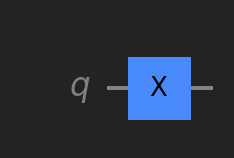

In [6]:
# Create quantum circuit with X gate
qc_x = QuantumCircuit(1)
qc_x.x(0)
qc_x.draw()

State before X gate:


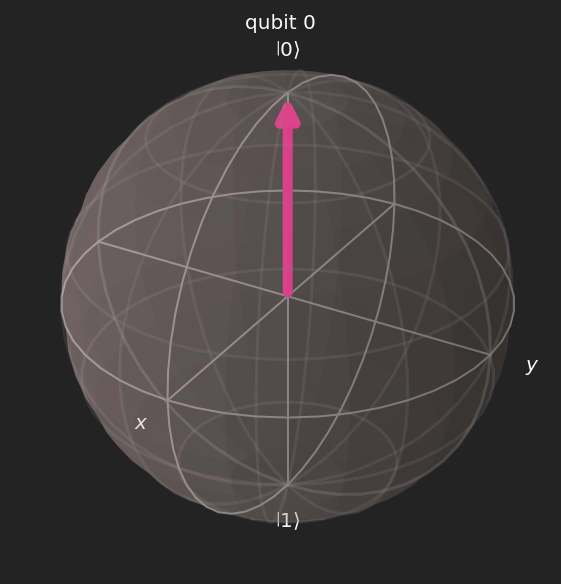

State after X gate:


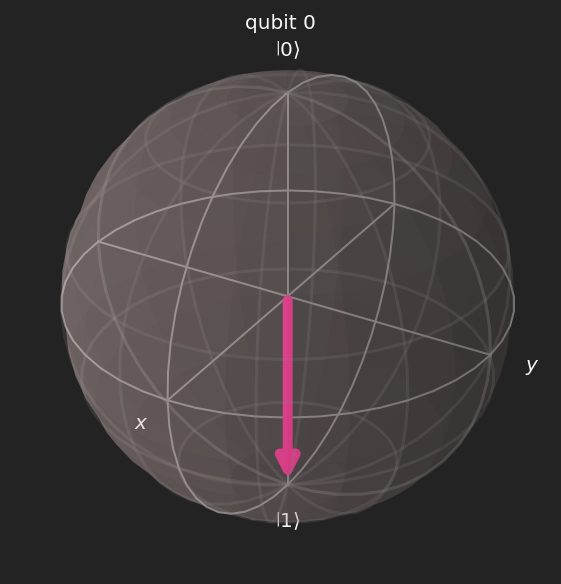

In [7]:
# Apply X gate to |0⟩ and display in Bloch sphere
ket_out = ket_0.evolve(qc_x)

# Show Bloch sphere before and after X gate
print('State before X gate:')
display(ket_0.draw('bloch'))
print('State after X gate:')
display(ket_out.draw('bloch'))

State before X gate:


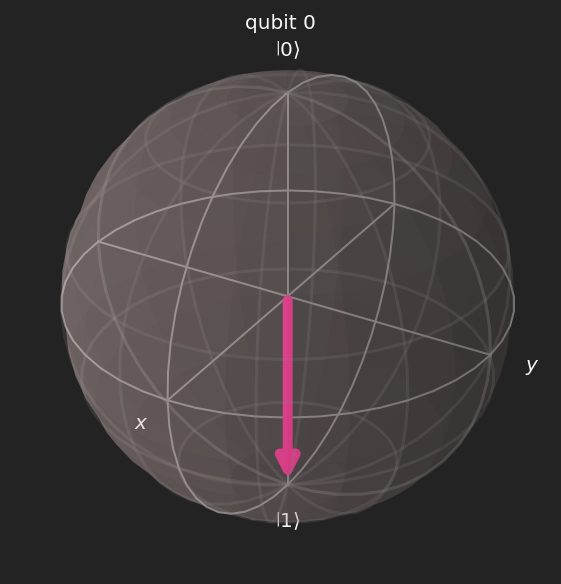

State after X gate:


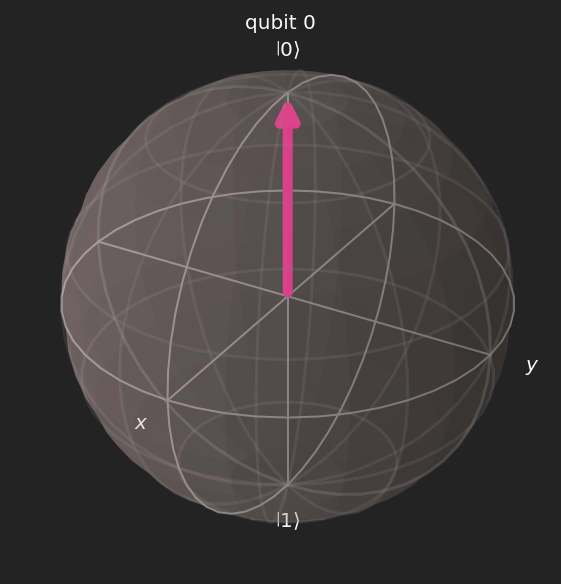

In [8]:
# Apply X gate to |1⟩ and display in Bloch sphere
ket_out = ket_1.evolve(qc_x)

# Show Bloch sphere before and after X gate
print('State before X gate:')
display(ket_1.draw('bloch'))
print('State after X gate:')
display(ket_out.draw('bloch'))

Now, let's see how the $Z$ gate acts on the sign basis states $|+\rangle$ and $|-\rangle$:

$$ 
\begin{aligned}
Z |+\rangle &= \begin{bmatrix} 1 & \phantom{-}0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
\\
\\
Z |+\rangle &= \begin{bmatrix} \phantom{-}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}
\\
\\
Z |+\rangle &= |-\rangle
\end{aligned}
$$

Similarly, we can show that: $ Z |-\rangle = |+\rangle .$

So the $Z$ gate "flips" the sign of the sign-basis states. Or, seen another way, the $Z$ gate rotates a vector pointing in the $\texttt{+}x$ direction in the Bloch sphere about the $\mathbf{z}$ **axis** all the way to having it point in the $\texttt{-}x$ direction (and vice versa). Let's see this in action using Qiskit:

In [9]:
# initialize states |+⟩ and |-⟩
ket_p = Statevector.from_label('+')
ket_m = Statevector.from_label('-')

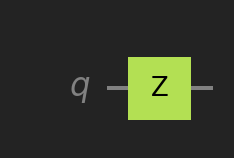

In [10]:
# Create quantum circuit with Z gate
qc_z = QuantumCircuit(1)
qc_z.z(0)
qc_z.draw()

State before Z gate:


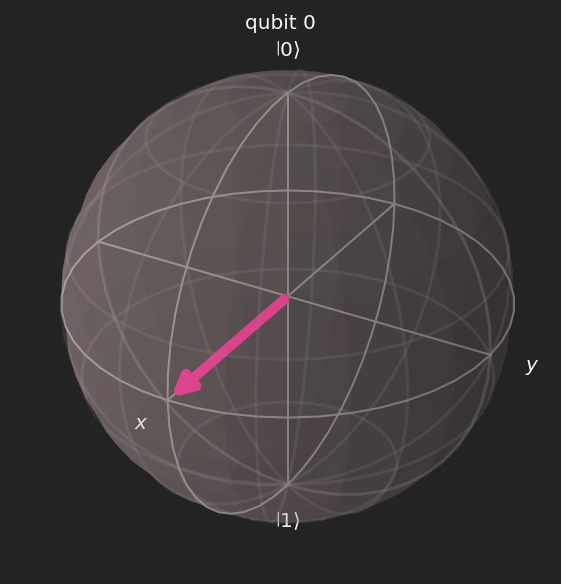

State after Z gate:


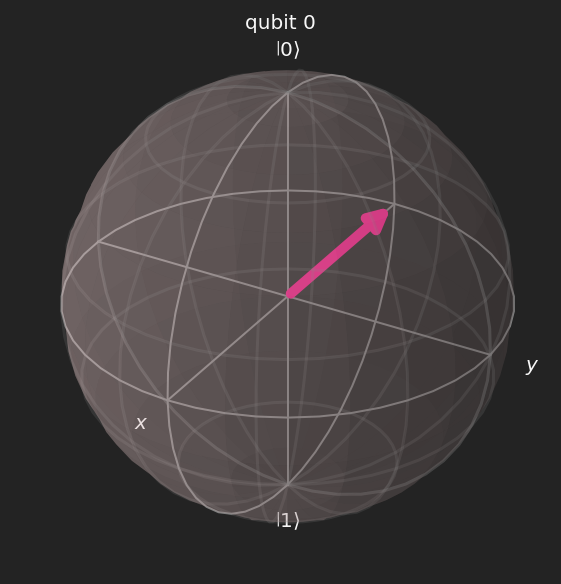

In [11]:
# Apply Z gate to |+⟩ and display in Bloch sphere
ket_out = ket_p.evolve(qc_z)

# Show Bloch sphere before and after Z gate
print('State before Z gate:')
display(ket_p.draw('bloch'))
print('State after Z gate:')
display(ket_out.draw('bloch'))

State before Z gate:


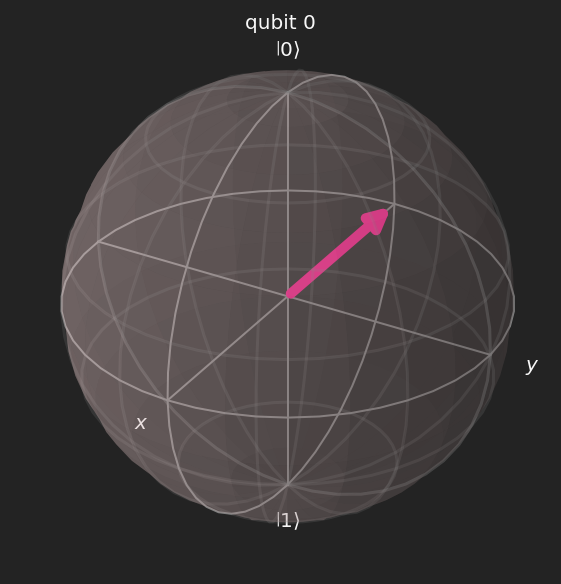

State after Z gate:


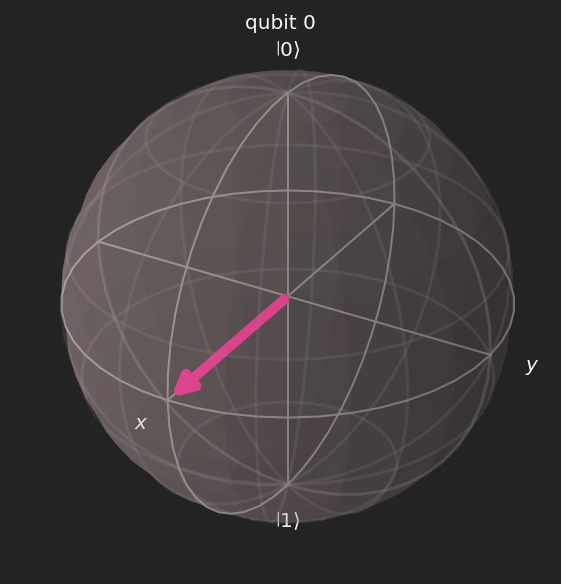

In [12]:
# Apply Z gate to |-⟩ and display in Bloch sphere
ket_out = ket_m.evolve(qc_z)

# Show Bloch sphere before and after Z gate
print('State before Z gate:')
display(ket_m.draw('bloch'))
print('State after Z gate:')
display(ket_out.draw('bloch'))

More generally, the $X$ and $Z$ gates can be interpreted as gates that rotate states in the Bloch sphere about the $x$ and $z$ axes by an angle of $\pi$ (or $180°$). This means that, since state $|0\rangle$ and $|1\rangle$ lie along the $z$ axis, the $Z$ should not change their state since they will be rotating about their own axis. And we can indeed show mathematically that this is true:

$$ 
\begin{aligned}
Z |0\rangle &= \begin{bmatrix} 1 & \phantom{-}0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle 
\\
\\
 Z |1\rangle &= \begin{bmatrix} 1 & \phantom{-}0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} =  \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -|1\rangle 
\end{aligned} 
$$

An interesting observation is that, for state $|1\rangle$ we do pick up a global phase of $-1$. This will become relevant when we discuss two-qubit controlled gates.

As for the $Y$ gate, well, in a similar way, this gate will rotate a statevector in the Bloch sphere by angle of $\pi$ about the $y$ axis.

### 2.2 The Phase-Gate Family

Another very important single-quibt gate is the phase gate $P$, given by:

$$ P(\varphi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\varphi} \end{bmatrix} $$

The role of this gate is to rotate a state in the Bloch sphere about the $z$ axis by an angle of $\phi$. Associated with it, there are two special cases of this gate: the $S$ gate, which is a phase gate for an angle of $\pi/2$, and the $T$ gate, which is a phase gate for an angle of $pi/4$. It is also worth noting that the $Z$ is a phase gate for an angle of $\pi$, so we have:

$$
\begin{aligned}
Z &= P(\pi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\\
\\
S &= P(\pi/2) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}
\\
\\
T &= P(\pi/4) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & \frac{(1+i)}{\sqrt{2}} \end{bmatrix}
\end{aligned}
$$

Let's define a circuit in Qiskit with 3 qubits to which we individually apply each of these gates to visualize the effect they have on the $|+\rangle$ state in the Bloch sphere:

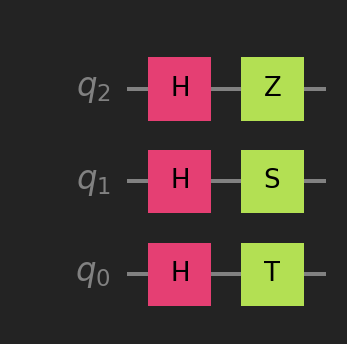

In [13]:
# Create quantum circuit with Z gate
qc_p = QuantumCircuit(3)
qc_p.h(range(3)) # prepare |+⟩ state in all three qubits
qc_p.z(2)
qc_p.s(1)
qc_p.t(0)
qc_p.draw()

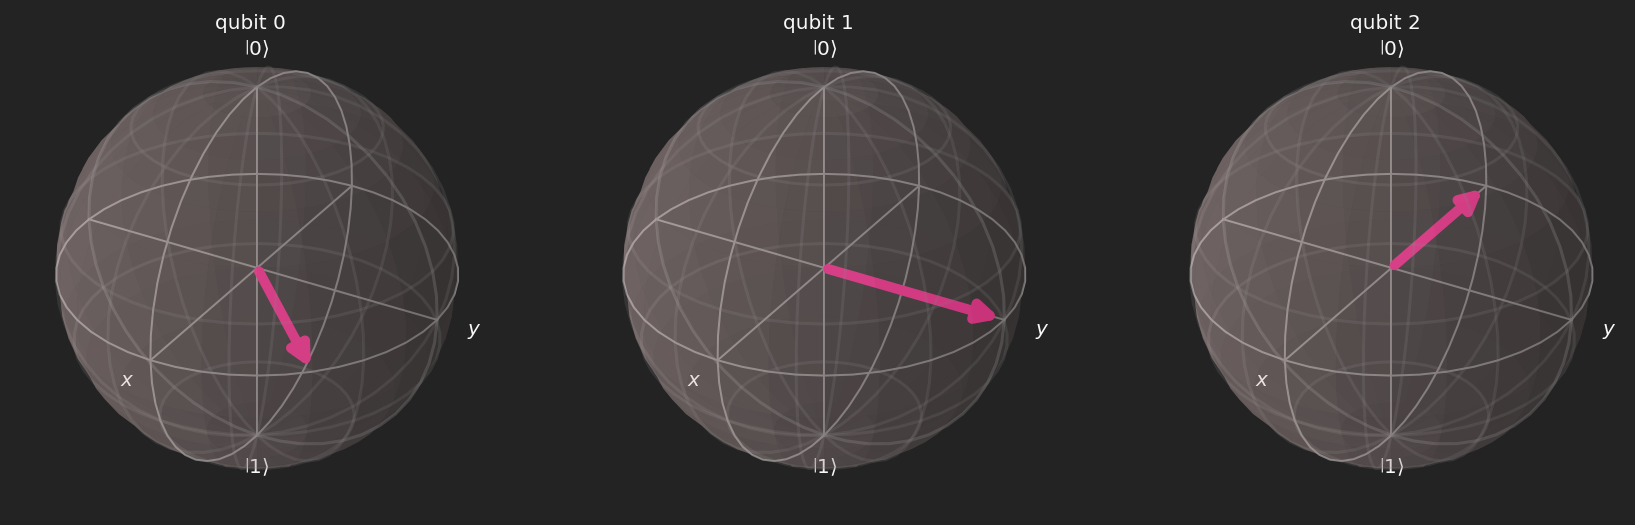

In [14]:
Statevector(qc_p).draw('bloch')

Another interesting observation about these gates is that, their corresponding conjugate transpose correspond to matrices that still rotate the state about the $z$ axis by the same angle, but in the opposite direction:

$$
\begin{aligned}
Z^{\dagger} &= \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi} \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = Z
\\
\\
S^{\dagger} &= \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/2} \end{bmatrix}
\\
\\
T^{\dagger} &= \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{bmatrix}
\end{aligned}
$$

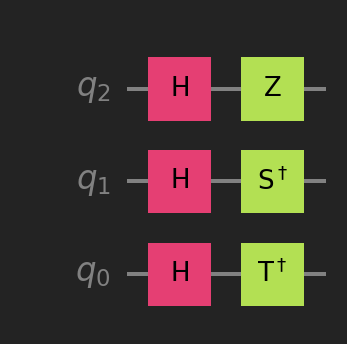

In [21]:
# Create quantum circuit with Z gate
qc_pdg = QuantumCircuit(3)
qc_pdg.h(range(3)) # prepare |+⟩ state in all three qubits
qc_pdg.z(2)
qc_pdg.sdg(1)
qc_pdg.tdg(0)
qc_pdg.draw()

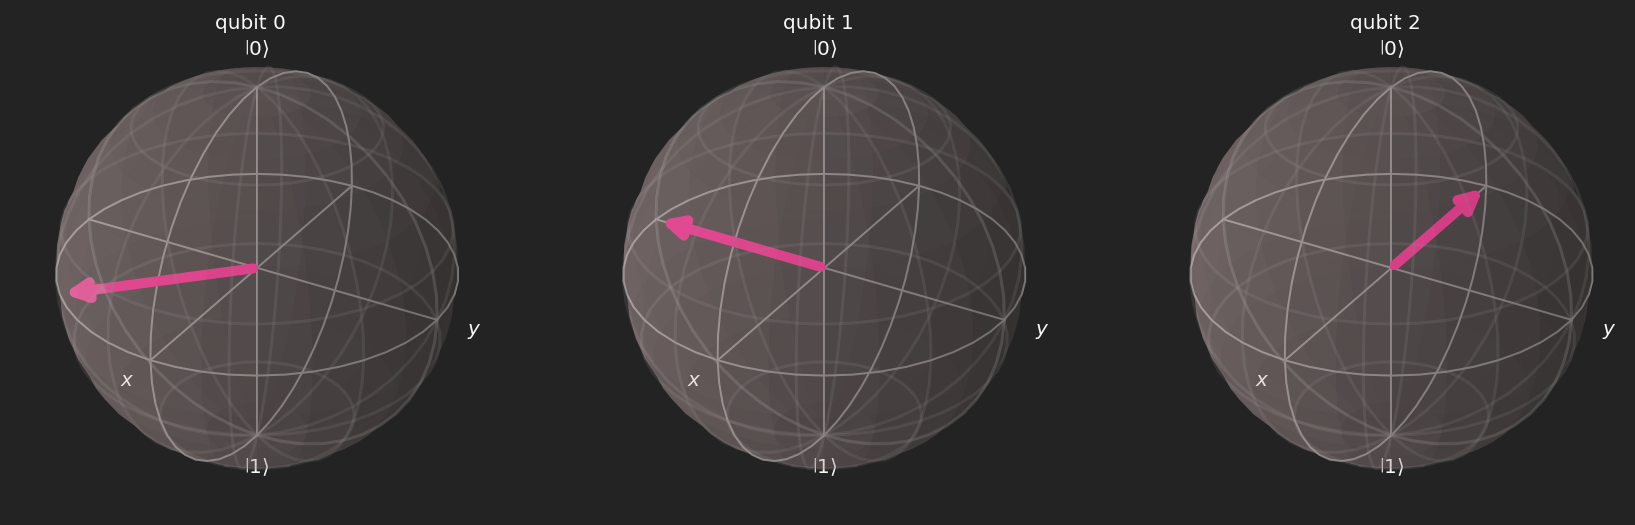

In [22]:
Statevector(qc_pdg).draw('bloch')

The $S$ gate is of particular importance because it has been demonstrated that, in combination with just two more gates (the $H$ gate and the $CX$ gate) one can efficiently approximate any other quantum gate. This result is known as the [Solovay-Kitaev theorem](https://en.wikipedia.org/wiki/Solovay%E2%80%93Kitaev_theorem), and it is of extreme importance in the development of [fault-tolerant quantum computing](https://en.wikipedia.org/wiki/Threshold_theorem).

### 2.3 General Rotation Gates

The last set of single-qubit gates we will discuss (at least for the moment) are the rotation gates $RX, RY, RX$, which as their name implies, rotate a statevector in the Bloch sphere about the $x, y, z$ axes, respectively:

$$
\begin{aligned}
RX(\theta) &= \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{bmatrix} 
\\
\\
RY(\theta) &= \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)  \end{bmatrix} 
\\
\\
RZ(\varphi) &= \begin{bmatrix} e^{-i\varphi/2} & 0 \\ 0 & e^{i\varphi/2}  \end{bmatrix} .
\end{aligned}
$$

It is worth noting that the $RZ$ gate is equivalent to the $P$ gate up to a global phase:

$$ RZ(\varphi) = e^{-i\varphi/2} P(\varphi) .$$

Let's look at an example for these three gates where we rotate the $|0\rangle$ state using $RX$ and $RY$ by an angle of $\theta = \pi/8$, and state $|+\rangle$ using $RZ$ with $\varphi = \pi/8$:

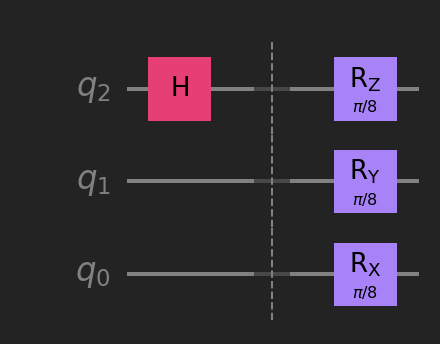

In [19]:
# Create quantum circuit with Z gate
qc_r = QuantumCircuit(3)
qc_r.h(2)            # Prepare qubit 2 in |+⟩ state
qc_r.barrier()
qc_r.rx(np.pi/8,0)   # Rotate qubit 0 using rx gate
qc_r.ry(np.pi/8,1)   # Rotate qubit 1 using ry gate
qc_r.rz(np.pi/8,2)   # Rotate qubit 2 using rz gate
qc_r.draw()

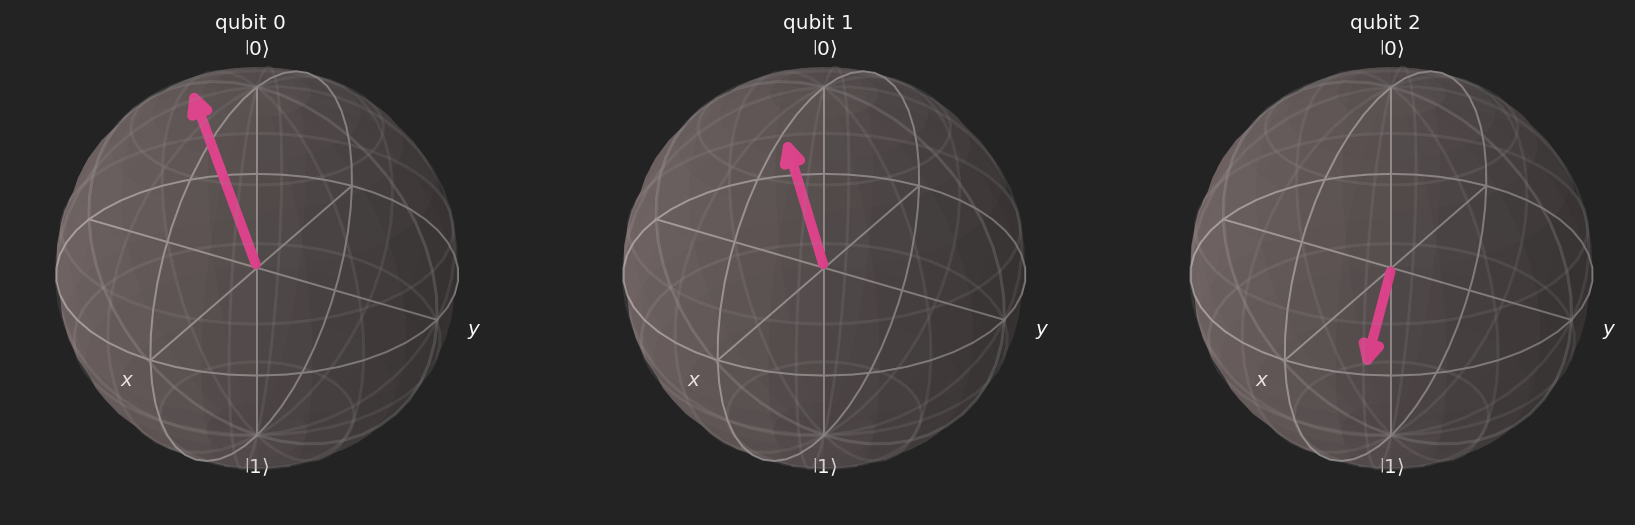

In [20]:
Statevector(qc_r).draw('bloch')

Even though there are an infinite number of possible unitary transformations, the ones we covered here are perhaps the most utilized ones. In the next chapter we will expand all of these ideas to multiple qubits and discuss the most common gates used to have two or more qubits interact.

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$Note that here we are just abstractly superimposing the complex plane with the physical $xy$-plane to assign a complex number to the corresponding statevector associated with the spin in some given direction on this plane. We are **not** saying that this complex number is related to the physical length of the spin vector, or directly multiplying the full statevector. The relation between this complex value and the state is clarified in the section discussing the Bloch sphere. ([go back](#back1))</span>
    
<a name="footnote2"></a><span style="font-size: smaller;">$^\dagger$Labeling these statevectors as $|r\rangle$ and $|l\rangle$ to respectively denote "right" and "left" seems a bit arbitrary; however, this nomenclature has become relatively standard, so that's what we will use. Some references use $|+i\rangle$ and $|-i\rangle$ instead, but this can also be confusing because it could denote having the tensor product of states plus or minus with some arbitrary state $i$. For example, $|+i\rangle$ could be confused with state $|+\rangle \otimes |i\rangle.$ ([go back](#back2))</span>

<a name="footnote3"></a><span style="font-size: smaller;">$^\ddagger$Admittedly, we are being fairly loose with the definition of a Hilbert space in here. More precisely, a finite-dimensional complex Hilbert space is a vector space over $\mathbb{C}$, equipped with an inner product that induces a complete norm. The definition we have for a qubit constitutes the subset of elements of a Hilbert space with norm equal to 1. ([go back](#back3))</span>